# Background

# Analysis

## 1. Importing libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

## 2. Importing data

In [62]:
url = "https://data.cms.gov/data-api/v1/dataset/5fccd951-9538-48a7-9075-6f02b9867868/data?&offset=20000"
response = requests.get(url)
print(response)

<Response [200]>


In [64]:
len(response.json())

1000

In [61]:
df = pd.DataFrame(response.json())
df.head(1)

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,1003120338,Kondareddy,Sreekanth,R,MD,M,I,4417 Vestal Pkwy E,,Vestal,...,"Initial hospital inpatient care, typically 50 ...",N,F,76,76,76,279.20105263,134.00223684,105.72105263,107.66039474


In [89]:
df = pd.read_csv('MUP_PHY_R21_P04_V10_D19_Prov_Svc.csv',nrows=50000)

In [90]:
df.shape

(50000, 29)

In [91]:
print('Number of unique providers: ',df['Rndrng_NPI'].nunique())

Number of unique providers:  5948


Variables of interest - 
1. Tot_Benes = Beneficiary segments
2. Avg_Mdcr_Stdzd_Amt = Payment segments 

In [92]:
#Changing default dtype from object to relevant numeric types
df['Tot_Benes'] = df['Tot_Benes'].astype(int)
df['Avg_Mdcr_Stdzd_Amt'] = df['Avg_Mdcr_Stdzd_Amt'].astype(float)

In [93]:
benefs = df.groupby('Rndrng_NPI').sum()['Tot_Benes']
print(benefs.shape)

(5948,)


In [94]:
payments = df.groupby('Rndrng_NPI').sum()['Avg_Mdcr_Stdzd_Amt']
print(payments.shape)

(5948,)


## EDA and Cleaning Data 

In [77]:
benefs.describe()

count     1979.000000
mean       706.609904
std       1249.908677
min         11.000000
25%        106.000000
50%        330.000000
75%        749.000000
max      15794.000000
Name: Tot_Benes, dtype: float64

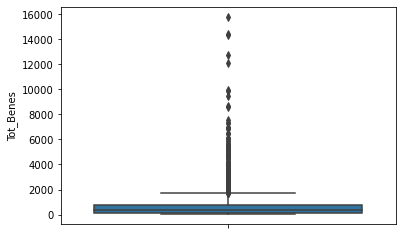

In [76]:
sns.boxplot(y=benefs,orient='Vertical');

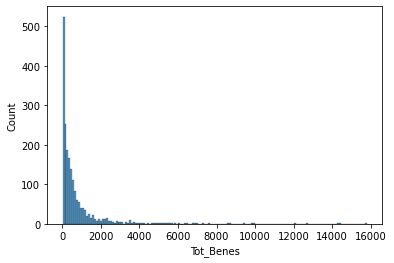

In [83]:
sns.histplot(benefs);

# Key Takeaways 